In [23]:
import pandas as pd
import numpy as np
data = pd.read_csv("dataset.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
import matplotlib.pyplot as plt

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [11]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

<BarContainer object of 5 artists>

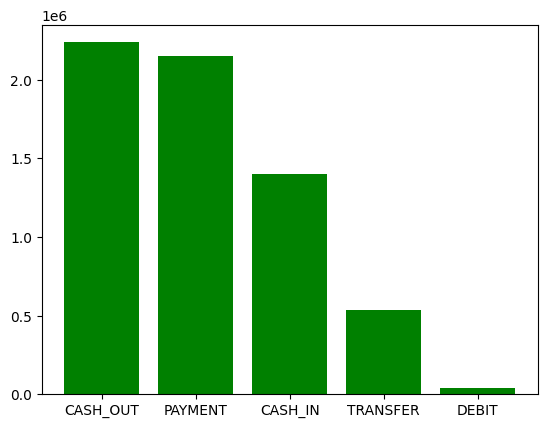

In [15]:
plt.bar(transactions,quantity,color='green')

In [16]:
# Checking correlation
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

<ipython-input-16-9ef8f8481cdf>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [24]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head(25)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,No Fraud,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,No Fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,Fraud,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,Fraud,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,No Fraud,0
5,1,2,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,No Fraud,0
6,1,2,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,No Fraud,0
7,1,2,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,No Fraud,0
8,1,2,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,No Fraud,0
9,1,5,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,No Fraud,0


In [26]:
data.tail(25)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362595,741,1,144945.34,C1092829426,144945.34,0.0,C716019997,0.00,144945.34,Fraud,0
6362596,741,4,48442.88,C1112979339,48442.88,0.0,C2114078084,0.00,0.00,Fraud,0
6362597,741,1,48442.88,C1706094385,48442.88,0.0,C2109905271,513746.19,562189.07,Fraud,0
6362598,742,4,4009058.39,C1044665079,4009058.39,0.0,C750074708,0.00,0.00,Fraud,0
6362599,742,1,4009058.39,C1970706589,4009058.39,0.0,C637394241,1229761.96,5238820.34,Fraud,0
6362600,742,4,652993.91,C40604503,652993.91,0.0,C1166857907,0.00,0.00,Fraud,0
6362601,742,1,652993.91,C1614818636,652993.91,0.0,C362803701,0.00,652993.91,Fraud,0
6362602,742,4,1819543.69,C2089752665,1819543.69,0.0,C112833674,0.00,0.00,Fraud,0
6362603,742,1,1819543.69,C1039979813,1819543.69,0.0,C2078394828,0.00,1819543.69,Fraud,0
6362604,742,4,54652.46,C1674778854,54652.46,0.0,C1930074465,0.00,0.00,Fraud,0


In [18]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [19]:
# training model
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9996990233583021

In [27]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 652993.91, 652993.91, 0.00]])
print(model.predict(features))

['Fraud']
